### EDA on Train Dataset

In [685]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [686]:
# Loading all the training datasets 

Train_Beneficiary = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train_Beneficiary.csv')
Train_Inpatient = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train_Inpatient.csv')
Train_Outpatient = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train_Outpatient.csv')
Test_label = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train.csv')

In [687]:
Test_label.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [688]:
pd.set_option('display.max_columns', 100) # shows all the columns

In [689]:
Train_Beneficiary.shape # number of rows & columns

(138556, 25)

In [690]:
Train_Inpatient.shape # number of rows & columns

(40474, 30)

In [691]:
Train_Outpatient.shape # number of rows & columns

(517737, 27)

In [692]:
Test_label.shape

(5410, 2)

## Dropping columns

In [693]:
Train_Beneficiary = Train_Beneficiary.drop(['DOD'], axis = 1)

In [694]:
Train_Inpatient = Train_Inpatient.drop(['ClmProcedureCode_6'], axis = 1) # dropping because 100% data as NAs

In [695]:
Train_Outpatient = Train_Outpatient.drop(['ClmProcedureCode_5', 'ClmProcedureCode_6'], axis = 1) # dropping because 100% data as NAs

## Replacing NAs with 0

In [696]:
Train_Inpatient[['DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']] = Train_Inpatient[[\
                                                                                             'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']].fillna(0)

In [697]:
Train_Outpatient[['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4']] = Train_Outpatient[['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4']].fillna(0)

In [698]:
Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].fillna('None')

In [699]:
Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].fillna('None')

## Counting number of missing values

In [700]:
Train_Beneficiary.isnull().sum() # row = 138556

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
dtype: int64

In [701]:
Train_Inpatient.isnull().sum() # row = 40474

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
AdmissionDt               0
ClmAdmitDiagnosisCode     0
DeductibleAmtPaid         0
DischargeDt               0
DiagnosisGroupCode        0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
ClmProcedureCode_4        0
ClmProcedureCode_5        0
dtype: int64

In [702]:
Train_Outpatient.isnull().sum() # row = 517737

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
ClmProcedureCode_4        0
DeductibleAmtPaid         0
ClmAdmitDiagnosisCode     0
dtype: int64

## Checking 1st 5 rows of all 3 data sets

In [703]:
Train_Beneficiary.head() # 1 means Yes, 2 means No

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [704]:
Train_Inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,0,331.0,0.0,0.0,0.0,0.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,0,3893.0,0.0,0.0,0.0,0.0


In [705]:
Train_Outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,0,0,0,0,0.0,0.0,0.0,0.0,0,71947


## Checking rows that has missing values for all 3 physician columns

In [706]:
Train_Outpatient.loc[(Train_Outpatient.AttendingPhysician.isnull() == True) & (Train_Outpatient.OperatingPhysician.isnull() == True) & ((Train_Outpatient.OtherPhysician.isnull() == True))]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,DeductibleAmtPaid,ClmAdmitDiagnosisCode


In [707]:
Train_Inpatient.loc[(Train_Inpatient.AttendingPhysician.isnull() == True) & (Train_Inpatient.OperatingPhysician.isnull() == True) & ((Train_Inpatient.OtherPhysician.isnull() == True))]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5


## Checking number of unique values in Physician columns

In [708]:
Train_Outpatient.AttendingPhysician.nunique()

74110

In [709]:
Train_Outpatient.OperatingPhysician.nunique()

28533

In [710]:
Train_Outpatient.OtherPhysician.nunique()

44389

## Merging Beneficiary & Fraud label data with inpatient & outpatient data (2 seperate dataframe)

In [711]:
Merged_Inpatient = pd.merge(Train_Beneficiary, Train_Inpatient, how = 'inner', on = 'BeneID')

In [712]:
Merged_Inpatient = pd.merge(Merged_Inpatient, Test_label, how = 'inner', on = 'Provider')

In [713]:
Merged_Outpatient = pd.merge(Train_Beneficiary, Train_Outpatient, how = 'inner', on = 'BeneID')

In [714]:
Merged_Outpatient = pd.merge(Merged_Outpatient, Test_label, how = 'inner', on = 'Provider')

In [715]:
Merged_Inpatient.head() # showing 1st 5 rows of the dataset

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes
1,BENE17521,1913-12-01,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes
2,BENE21718,1922-10-01,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes
3,BENE22934,1930-07-01,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,0,0,0,8154.0,0.0,0.0,0.0,0.0,Yes
4,BENE24402,1925-09-01,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,None,2009-01-08,1748,1068.0,2009-01-12,593,2330,0,0,0,0,0,0,0,0,0,8543.0,0.0,0.0,0.0,0.0,Yes


In [716]:
Merged_Outpatient.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,1936-09-01,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,56409,Yes
1,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,Yes
2,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,0,0,0,0,0.0,0.0,0.0,0.0,0,71947,Yes
3,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,None,None,20381,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,Yes
4,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,None,None,V6546,4280,2449,V854,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,Yes


In [717]:
Test_label.loc[Test_label.Provider == 'PRV56011'] # cheking provider IDs for Potential Fraud

,Provider,PotentialFraud
4004,PRV56011,Yes


## Replacing values representing 'No' with number 0 for ease of computation

In [718]:
replace_two = ['Gender', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', \
                      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

Merged_Inpatient.RenalDiseaseIndicator = Merged_Inpatient.RenalDiseaseIndicator.replace('Y', 1)
Merged_Inpatient[replace_two] = Merged_Inpatient[replace_two].replace(2, 0)

In [719]:
Merged_Outpatient.RenalDiseaseIndicator = Merged_Outpatient.RenalDiseaseIndicator.replace('Y', 1)
Merged_Outpatient[replace_two] = Merged_Outpatient[replace_two].replace(2, 0)

In [720]:
# printing all the unique values to make sure the columns are good to go (Inpatient)
for column in replace_two:
    print(column, Merged_Inpatient[column].unique())

Gender [1 0]
ChronicCond_Alzheimer [1 0]
ChronicCond_Heartfailure [0 1]
ChronicCond_KidneyDisease [1 0]
ChronicCond_Cancer [0 1]
ChronicCond_ObstrPulmonary [0 1]
ChronicCond_Depression [1 0]
ChronicCond_Diabetes [1 0]
ChronicCond_IschemicHeart [1 0]
ChronicCond_Osteoporasis [0 1]
ChronicCond_rheumatoidarthritis [1 0]
ChronicCond_stroke [1 0]


In [721]:
# printing all the unique values to make sure the columns are good to go (Outpatient)
for column in replace_two:
    print(column, Merged_Outpatient[column].unique())

Gender [0 1]
ChronicCond_Alzheimer [0 1]
ChronicCond_Heartfailure [0 1]
ChronicCond_KidneyDisease [0 1]
ChronicCond_Cancer [0 1]
ChronicCond_ObstrPulmonary [0 1]
ChronicCond_Depression [0 1]
ChronicCond_Diabetes [0 1]
ChronicCond_IschemicHeart [0 1]
ChronicCond_Osteoporasis [0 1]
ChronicCond_rheumatoidarthritis [0 1]
ChronicCond_stroke [0 1]


## How many medical doctors are there in the train inpatient dataset? 

In [722]:
x = Train_Inpatient.AttendingPhysician.unique().tolist()
y = Train_Inpatient.OperatingPhysician.unique().tolist()
z = Train_Inpatient.OtherPhysician.unique().tolist()
len(set(x+y+z)) # minus 1 for None type. 18256

18257

### Do inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients? Provide an analysis on these issues.

In [723]:
chronic_conditions = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', \
                      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

Merged_Inpatient['Chronic_Condition_Count'] = Merged_Inpatient[chronic_conditions].sum(axis = 1)

Merged_Outpatient['Chronic_Condition_Count'] = Merged_Outpatient[chronic_conditions].sum(axis = 1)

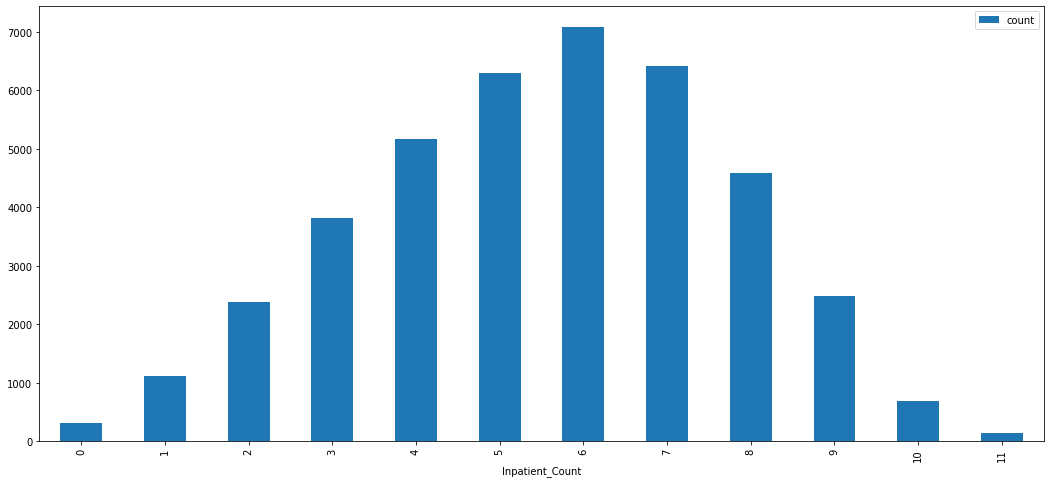

In [724]:
chronic_count_per_Inpatients.groupby('Inpatient_Count')['Inpatient_Count'].agg(['count']).plot.bar()

## Do those who have more visits to the providers have worse health conditions?

In [725]:
visit_count = Merged_Inpatient.groupby('BeneID')['BeneID'].agg(['count'])
Merged_Inpatient = Merged_Inpatient.merge(visit_count, how = 'inner', on = 'BeneID')
Merged_Inpatient = Merged_Inpatient.rename(columns = {'count': 'Visit_count'})

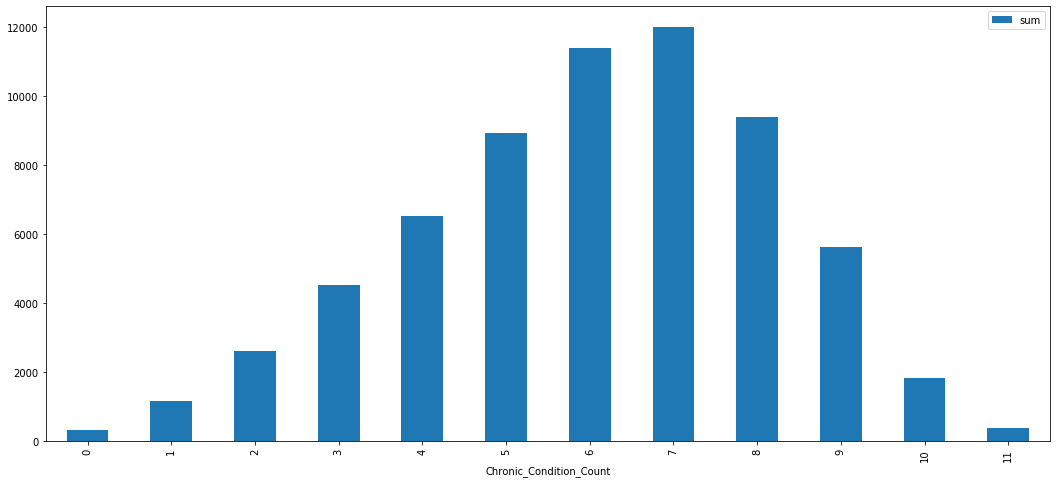

In [726]:
Merged_Inpatient.groupby('Chronic_Condition_Count')['Visit_count'].agg(['sum']).plot.bar()

In [727]:
visit_count_2 = Merged_Outpatient.groupby('BeneID')['BeneID'].agg(['count'])
Merged_Outpatient = Merged_Outpatient.merge(visit_count_2, how = 'inner', on = 'BeneID')
Merged_Outpatient = Merged_Outpatient.rename(columns = {'count': 'Visit_count'})

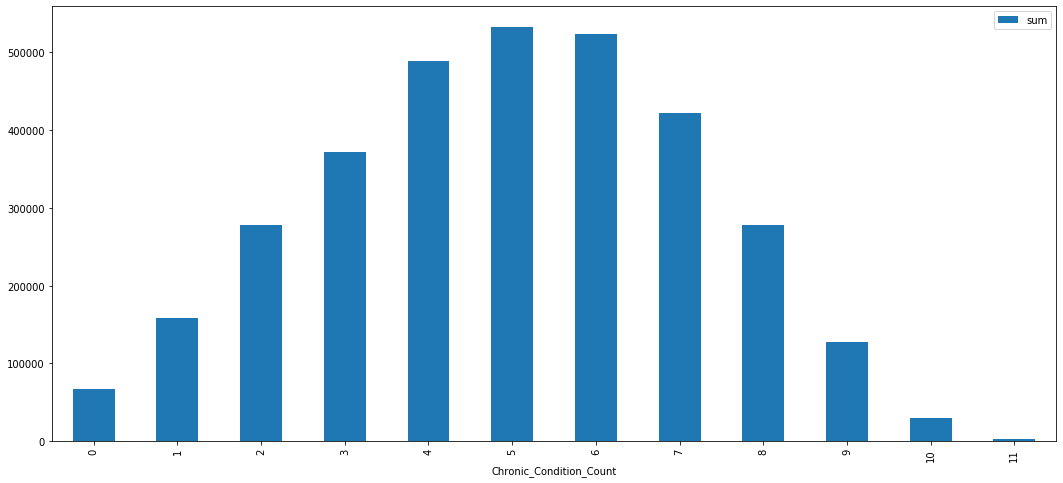

In [728]:
Merged_Outpatient.groupby('Chronic_Condition_Count')['Visit_count'].agg(['sum']).plot.bar()

In [729]:
chronic_count_per_Inpatients = pd.DataFrame(Merged_Inpatient[chronic_conditions].sum(axis = 1)).sort_values(by = 0, ascending = False)
chronic_count_per_Inpatients.columns = ['Inpatient_Count'] # renamed column name
x = chronic_count_per_Inpatients.groupby('Inpatient_Count')['Inpatient_Count'].agg(['count'])

chronic_count_per_Outpatients = pd.DataFrame(Merged_Outpatient[chronic_conditions].sum(axis = 1)).sort_values(by = 0, ascending = False)
chronic_count_per_Outpatients.columns = ['Outpatient_Count']
y = chronic_count_per_Outpatients.groupby('Outpatient_Count')['Outpatient_Count'].agg(['count'])

In [730]:
z = pd.concat([x, y], axis = 1).reset_index()
z.columns = [['Condition_Count', 'inpatients_count', 'outpatients_count']]
# z['Difference'] = z['outpatients_count'] - z['inpatients_count']
z

,Condition_Count,inpatients_count,outpatients_count
0,0,302,21591
1,1,1120,40210
2,2,2377,57638
3,3,3820,68542
4,4,5177,78284
5,5,6292,76406
6,6,7085,69431
7,7,6421,53754
8,8,4585,33302
9,9,2475,14747


## Do doctors serve for different providers? Study the distribution of hospital counts per doctor? Is it possible to characterize those doctors who move around among different providers?

In [731]:
AP = Merged_Inpatient[['Provider', 'AttendingPhysician']].copy().rename(columns = {'AttendingPhysician': 'Physician'})
OPP = Merged_Inpatient[['Provider', 'OperatingPhysician']].copy().rename(columns = {'OperatingPhysician': 'Physician'})
OP = Merged_Inpatient[['Provider', 'OtherPhysician']].copy().rename(columns = {'OtherPhysician': 'Physician'})

merged_physician = pd.concat([AP, OPP,OP], axis = 0)

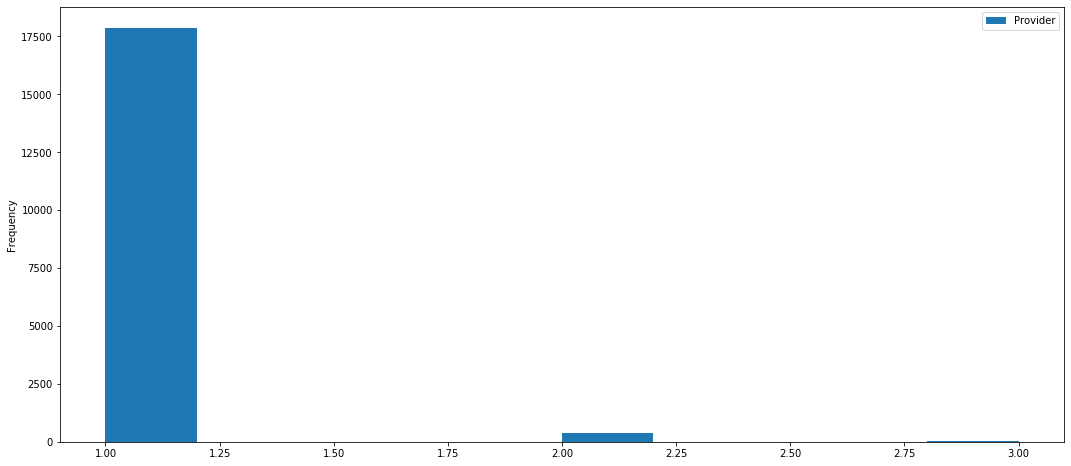

In [732]:
provider_count_in = pd.DataFrame(merged_physician.groupby('Physician')['Provider'].agg('nunique')).sort_values(ascending = False, by = 'Provider').drop('None', axis = 0).reset_index()
provider_count_in.plot.hist()

In [733]:
provider_count_in

,Physician,Provider
0,PHY395862,3
1,PHY316039,3
2,PHY348595,3
3,PHY423850,3
4,PHY362823,3
...,...,...
18251,PHY352396,1
18252,PHY352410,1
18253,PHY352411,1
18254,PHY352415,1


In [734]:
provider_count_in.groupby('Provider')['Physician'].agg('count')

Provider
1    17882
2      360
3       14
Name: Physician, dtype: int64

In [735]:
AP_out = Merged_Outpatient[['Provider', 'AttendingPhysician']].copy().rename(columns = {'AttendingPhysician': 'Physician'})
OPP_out = Merged_Outpatient[['Provider', 'OperatingPhysician']].copy().rename(columns = {'OperatingPhysician': 'Physician'})
OP_out = Merged_Outpatient[['Provider', 'OtherPhysician']].copy().rename(columns = {'OtherPhysician': 'Physician'})

merged_physician_out = pd.concat([AP_out, OPP_out,OP_out], axis = 0)

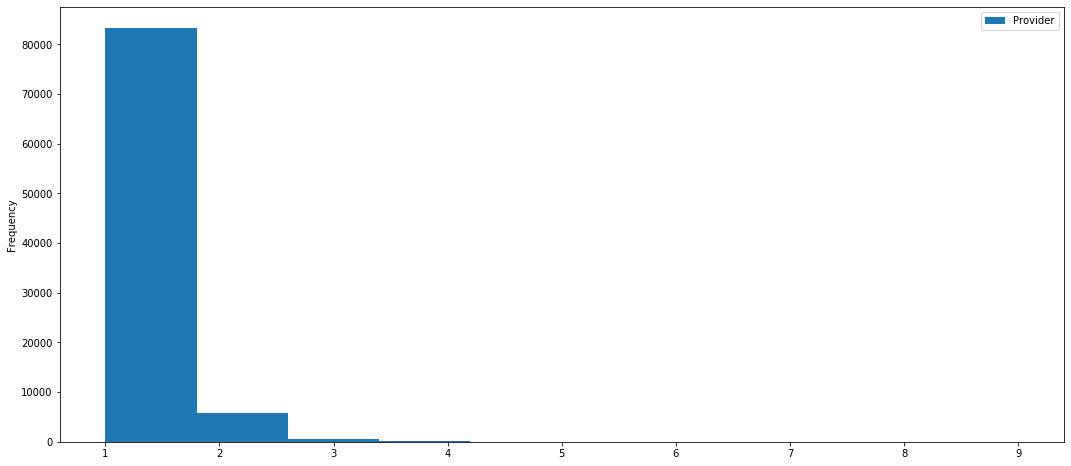

In [736]:
provider_count_out = pd.DataFrame(merged_physician_out.groupby('Physician')['Provider'].agg('nunique')).sort_values(ascending = False, by = 'Provider').drop('None', axis = 0).reset_index()
provider_count_out.plot.hist()

In [737]:
provider_count_out.groupby('Provider')['Physician'].agg('count')

Provider
1    83392
2     5760
3      505
4       75
5       27
6        8
8        2
9        1
Name: Physician, dtype: int64

## Do patients go to different hospitals? Study the distribution of hospital counts per patients? Is it possible to characterize those patients who receive services from a lot of different hospitals?

In [738]:
patient_count_in = pd.DataFrame(Merged_Inpatient.groupby('BeneID')['Provider'].agg('nunique')).sort_values(ascending = False, by = 'Provider').reset_index()
patient_count_in.head(20)

,BeneID,Provider
0,BENE126118,5
1,BENE83032,5
2,BENE55497,5
3,BENE104565,5
4,BENE55873,5
5,BENE43638,5
6,BENE117116,5
7,BENE92472,5
8,BENE49263,5
9,BENE63935,5


In [739]:
patient_count_in.groupby('Provider')['BeneID'].agg('count')

Provider
1    26694
2     3965
3      541
4       76
5       13
Name: BeneID, dtype: int64

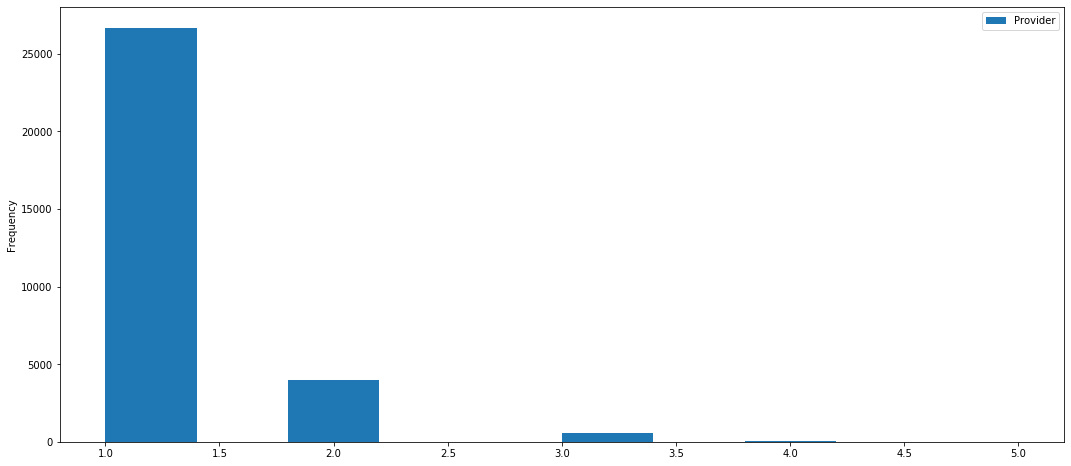

In [740]:
patient_count_in.plot.hist()

In [741]:
patient_count_out = pd.DataFrame(Merged_Outpatient.groupby('BeneID')['Provider'].agg('nunique')).sort_values(ascending = False, by = 'Provider').reset_index()
patient_count_out.head(20)

,BeneID,Provider
0,BENE40202,19
1,BENE122143,17
2,BENE122118,16
3,BENE153509,16
4,BENE120090,16
5,BENE140999,16
6,BENE37573,15
7,BENE11132,15
8,BENE107120,15
9,BENE32909,15


In [742]:
patient_count_out.groupby('Provider')['BeneID'].agg('count')

Provider
1     49671
2     34432
3     21370
4     12646
5      7168
6      3992
7      2277
8      1192
9       610
10      288
11      177
12       89
13       39
14       12
15       11
16        4
17        1
19        1
Name: BeneID, dtype: int64

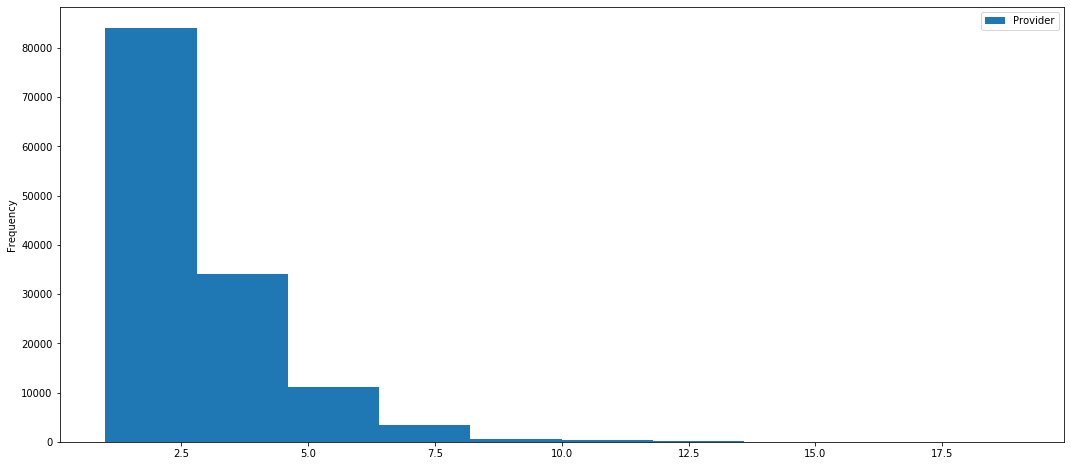

In [743]:
patient_count_out.plot.hist()

In [744]:
Merged_Outpatient.loc[Merged_Outpatient.BeneID == 'BENE122873']

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,Chronic_Condition_Count,Visit_count
83778,BENE122873,1975-04-01,0,1,1,11,470,12,12,1,1,1,0,1,1,1,1,0,0,1,20000,4272,330,510,CLM219938,2009-02-28,2009-02-28,PRV52521,60,PHY430748,None,None,78907,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,78900,No,8,4
83779,BENE122873,1975-04-01,0,1,1,11,470,12,12,1,1,1,0,1,1,1,1,0,0,1,20000,4272,330,510,CLM371309,2009-05-21,2009-05-21,PRV52395,90,PHY367015,None,None,41189,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,No,8,4
83780,BENE122873,1975-04-01,0,1,1,11,470,12,12,1,1,1,0,1,1,1,1,0,0,1,20000,4272,330,510,CLM360309,2009-05-15,2009-05-15,PRV52341,60,PHY371579,None,PHY424344,25022,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,No,8,4
83781,BENE122873,1975-04-01,0,1,1,11,470,12,12,1,1,1,0,1,1,1,1,0,0,1,20000,4272,330,510,CLM641742,2009-10-21,2009-10-21,PRV52308,80,PHY426416,None,PHY426416,30392,2989,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,Yes,8,4


## Do the same providers provide both inpatient and outpatient services? Summarize your findings.

In [745]:
unique_Out = Merged_Outpatient.Provider.unique() # 5012 providers
unique_In = Merged_Inpatient.Provider.unique() # 2092 providers

In [746]:
len(np.intersect1d(unique_Out, unique_In))

1694

These are patient claims. Just because a patient got only inpatient or only outpatient services does not mean that they only provide these services.

## Do Some of the same patients receive both inpatient and outpatient services? Summarize your findings.

In [747]:
Bene_Out = Merged_Outpatient.BeneID.unique() # 133980 providers
Bene_In = Merged_Inpatient.BeneID.unique() # 31289 providers

In [748]:
len(np.intersect1d(Bene_Out, Bene_In))

26713

## Study the relationship between the patient ages (at the time of their service) and the counts of medical claims.

In [749]:
# Calculating Age
Merged_Inpatient['Age'] = int(2009) - Merged_Inpatient.DOB.apply(lambda x: x.split('-')[0]).astype('int')
count_of_claims = pd.DataFrame(Merged_Inpatient.groupby('BeneID')['ClaimID'].agg('count')).rename(columns = {'ClaimID': 'Count_of_Claims'})
Merged_Inpatient = Merged_Inpatient.merge(count_of_claims, on = 'BeneID')

In [750]:
# Calculating Age
Merged_Outpatient['Age'] = int(2009) - Merged_Outpatient.DOB.apply(lambda x: x.split('-')[0]).astype('int')
count_of_claims = pd.DataFrame(Merged_Outpatient.groupby('BeneID')['ClaimID'].agg('count')).rename(columns = {'ClaimID': 'Count_of_Claims'})
Merged_Outpatient = Merged_Outpatient.merge(count_of_claims, on = 'BeneID')

In [751]:
Merged_Outpatient.drop_duplicates('BeneID')[['Chronic_Condition_Count', 'Age']].corr()

,Chronic_Condition_Count,Age
Chronic_Condition_Count,1.000000,0.070614
Age,0.070614,1.000000


In [752]:
Merged_Inpatient.drop_duplicates('BeneID')[['Chronic_Condition_Count', 'Age']].corr()

,Chronic_Condition_Count,Age
Chronic_Condition_Count,1.000000,0.055988
Age,0.055988,1.000000


In [753]:
Merged_Inpatient[['Chronic_Condition_Count', 'Count_of_Claims']].corr()

,Chronic_Condition_Count,Count_of_Claims
Chronic_Condition_Count,1.000000,0.411111
Count_of_Claims,0.411111,1.000000


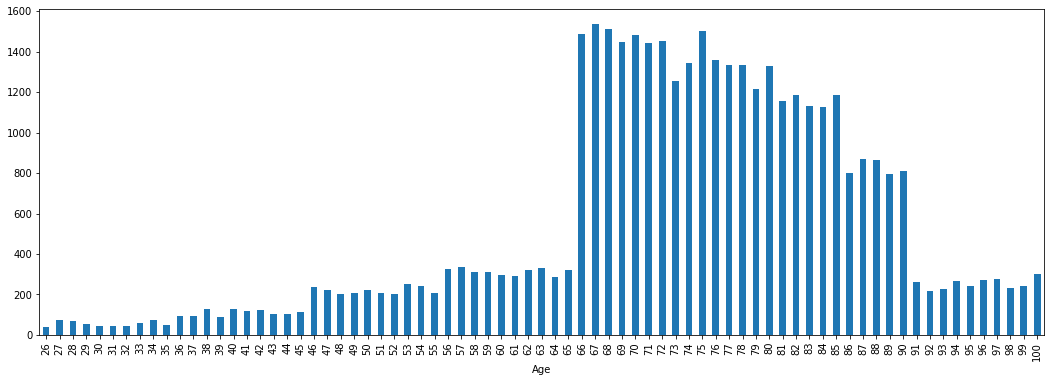

In [754]:
rcParams['figure.figsize'] = 18, 6
Merged_Inpatient.groupby('Age')['Count_of_Claims'].agg('count').plot.bar()

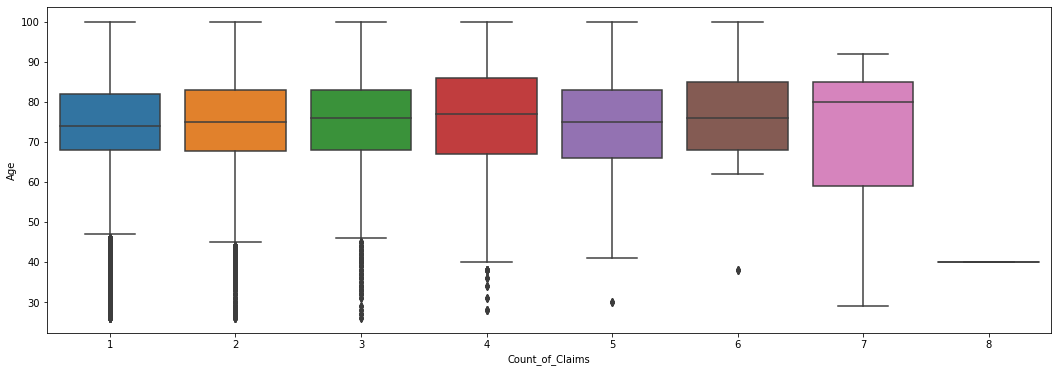

In [755]:
sns.boxplot(x = 'Count_of_Claims', y = 'Age', data = Merged_Inpatient)

## Study the relationship between the patient's age and their chronic conditions. Within the train-samples, do these chronic conditions show a definite trend with respect to increasing ages?

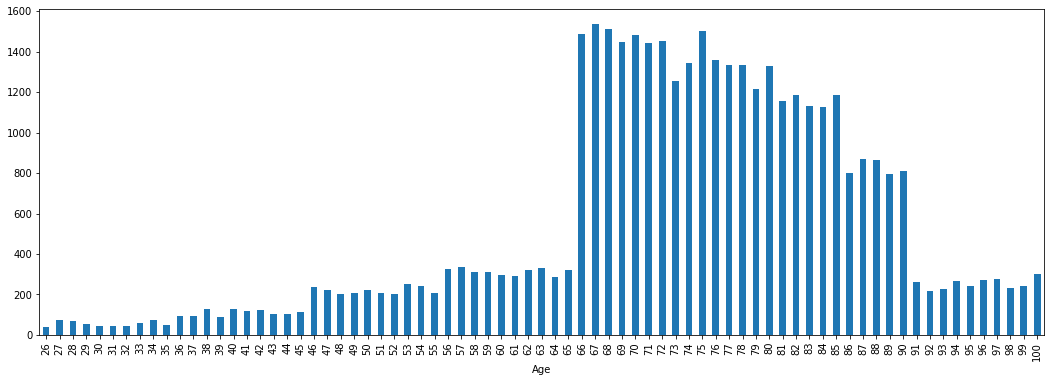

In [756]:
rcParams['figure.figsize'] = 18, 6
Merged_Inpatient.groupby('Age')['Chronic_Condition_Count'].agg('count').plot.bar()

In [757]:
pd.DataFrame(Merged_Inpatient.corr().unstack().drop_duplicates().sort_values(ascending = False)).head(30)

,,0
Gender,Gender,1.000000
OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,0.806229
IPAnnualReimbursementAmt,InscClaimAmtReimbursed,0.610995
IPAnnualDeductibleAmt,Visit_count,0.581625
IPAnnualReimbursementAmt,Visit_count,0.564423
ChronicCond_Heartfailure,Chronic_Condition_Count,0.524263
ChronicCond_KidneyDisease,Chronic_Condition_Count,0.522567
ChronicCond_ObstrPulmonary,Chronic_Condition_Count,0.512218
ChronicCond_Diabetes,Chronic_Condition_Count,0.504254
ChronicCond_Alzheimer,Chronic_Condition_Count,0.475882


In [758]:
pd.DataFrame(Merged_Outpatient.corr().unstack().drop_duplicates().sort_values(ascending = False)).head(30)

,,0
Gender,Gender,1.000000
OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,0.839705
IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,0.646991
ChronicCond_KidneyDisease,Chronic_Condition_Count,0.584503
ChronicCond_Diabetes,Chronic_Condition_Count,0.575125
ChronicCond_Heartfailure,Chronic_Condition_Count,0.571009
ChronicCond_ObstrPulmonary,Chronic_Condition_Count,0.529632
OPAnnualDeductibleAmt,Visit_count,0.528271
ChronicCond_IschemicHeart,Chronic_Condition_Count,0.517618
OPAnnualReimbursementAmt,Visit_count,0.504800


In [759]:
Merged_Inpatient.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Chronic_Condition_Count,Visit_count,Age,Count_of_Claims
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes,7,3,66,3
1,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,No,7,3,66,3
2,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,7,3,66,3
3,BENE17521,1913-12-01,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes,5,1,96,1
4,BENE21718,1922-10-01,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes,2,1,87,1


In [760]:
Merged_Inpatient.loc[Merged_Inpatient.BeneID == 'BENE11001']

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Chronic_Condition_Count,Visit_count,Age,Count_of_Claims
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes,7,3,66,3
1,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,No,7,3,66,3
2,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,7,3,66,3


## From the prospect of the insurance company, the reimbursed amounts are their coverage on the claims. Please analyze the patterns of the total reimbursed amounts (or average reimbursed amounts/visit) vs different types of patients.

In [761]:
Merged_Inpatient.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagno

        IPAnnualReimbursementAmt  OPAnnualReimbursementAmt
Gender                                                    
0                   14201.372068               1692.065066
1                   14237.052032               1648.637727
----------------------------------------------------------------------------------------------------
      IPAnnualReimbursementAmt  OPAnnualReimbursementAmt
Race                                                    
1                 14168.572239               1650.658268
2                 14766.530098               1924.352348
3                 13948.722015               1451.688433
5                 13907.577741               1750.834697
----------------------------------------------------------------------------------------------------
                         IPAnnualReimbursementAmt  OPAnnualReimbursementAmt
Chronic_Condition_Count                                                    
0                                     9388.087248                467

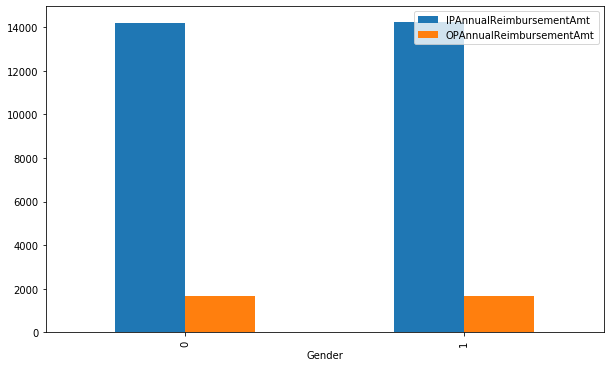

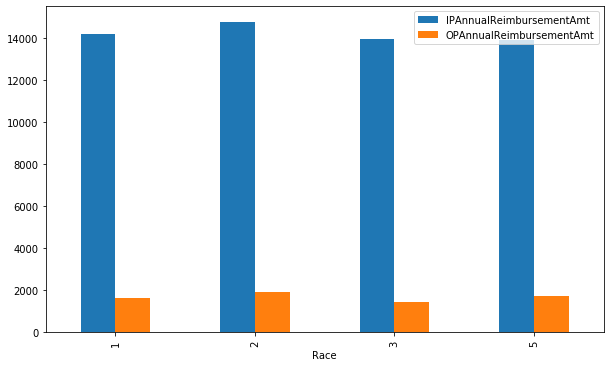

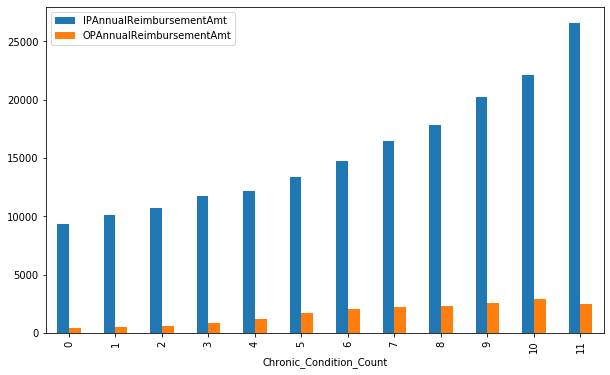

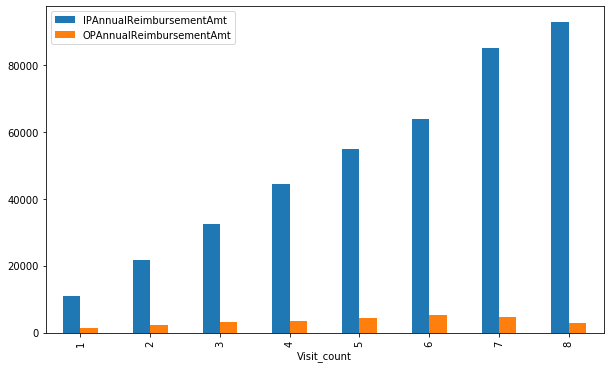

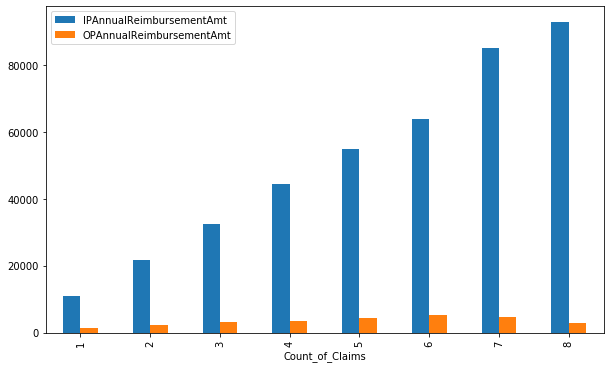

In [762]:
rcParams['figure.figsize'] = 10, 6
names = ['Gender', 'Race', 'Chronic_Condition_Count', 'Visit_count', 'Count_of_Claims']

no_dup_merge_in = Merged_Inpatient.drop_duplicates('BeneID')

for na in names:
    x = no_dup_merge_in.groupby(na)[['IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt']].agg('mean')
    print(x)
    print('-' * 100)
    x.plot.bar()

        IPAnnualReimbursementAmt  OPAnnualReimbursementAmt
Gender                                                    
0                    3365.808623               1350.803461
1                    3319.319538               1312.737683
----------------------------------------------------------------------------------------------------
      IPAnnualReimbursementAmt  OPAnnualReimbursementAmt
Race                                                    
1                  3338.765005               1321.069558
2                  3578.363093               1473.340486
3                  3049.108345               1274.535809
5                  3070.589698               1334.401421
----------------------------------------------------------------------------------------------------
                         IPAnnualReimbursementAmt  OPAnnualReimbursementAmt
Chronic_Condition_Count                                                    
0                                      167.919319                488

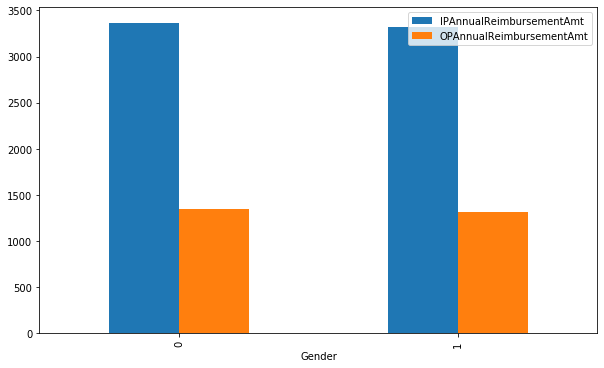

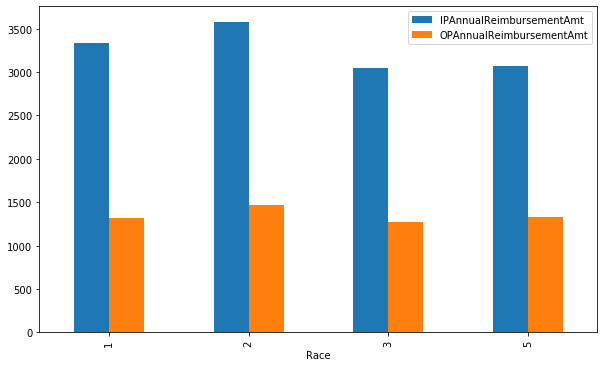

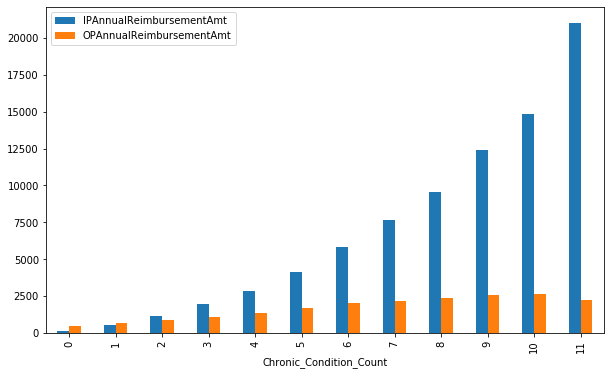

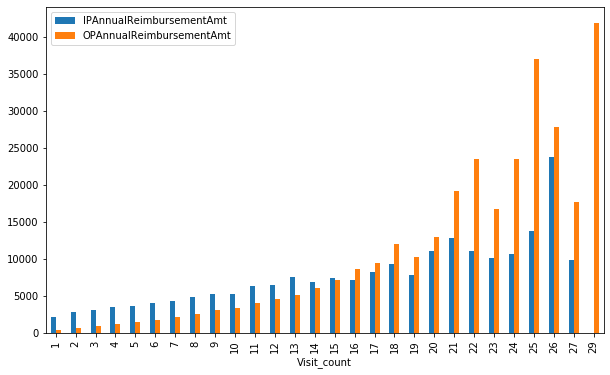

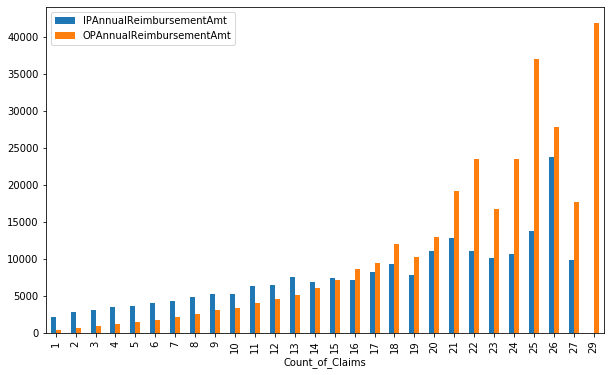

In [763]:
rcParams['figure.figsize'] = 10, 6
names = ['Gender', 'Race', 'Chronic_Condition_Count', 'Visit_count', 'Count_of_Claims']

no_dup_merge_out = Merged_Outpatient.drop_duplicates('BeneID')

for na in names:
    x = no_dup_merge_out.groupby(na)[['IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt',]].agg('mean')
    print(x)
    print('-' * 100)
    x.plot.bar()

## What are the weekly patterns (weekly seasonalities) you observe for the demands on inpatient or outpatient services? 

In [764]:
# converting all dates columns to data time format
import datetime

Merged_Inpatient['DOB'] = pd.to_datetime(Merged_Inpatient['DOB'])
Merged_Inpatient['ClaimStartDt'] = pd.to_datetime(Merged_Inpatient['ClaimStartDt'])
Merged_Inpatient['ClaimEndDt'] = pd.to_datetime(Merged_Inpatient['ClaimEndDt'])
Merged_Inpatient['AdmissionDt'] = pd.to_datetime(Merged_Inpatient['AdmissionDt'])
Merged_Inpatient['DischargeDt'] = pd.to_datetime(Merged_Inpatient['DischargeDt'])

Merged_Outpatient['DOB'] = pd.to_datetime(Merged_Outpatient['DOB'])
Merged_Outpatient['ClaimStartDt'] = pd.to_datetime(Merged_Outpatient['ClaimStartDt'])
Merged_Outpatient['ClaimEndDt'] = pd.to_datetime(Merged_Outpatient['ClaimEndDt'])

In [765]:
Merged_Inpatient['ClaimStart_Day'] = Merged_Inpatient['ClaimStartDt'].dt.dayofweek
Merged_Outpatient['ClaimStart_Day'] = Merged_Inpatient['ClaimStartDt'].dt.dayofweek

In [766]:
Merged_Inpatient['ClaimStart_Week'] = Merged_Inpatient['ClaimStartDt'].dt.strftime("%V")
Merged_Outpatient['ClaimStart_Week'] = Merged_Inpatient['ClaimStartDt'].dt.strftime("%V")

In [767]:
Merged_Inpatient.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Chronic_Condition_Count,Visit_count,Age,Count_of_Claims,ClaimStart_Day,ClaimStart_Week
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes,7,3,66,3,6,15
1,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,No,7,3,66,3,0,36
2,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,7,3,66,3,3,38
3,BENE17521,1913-12-01,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes,5,1,96,1,1,04
4,BENE21718,1922-10-01,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes,2,1,87,1,5,42


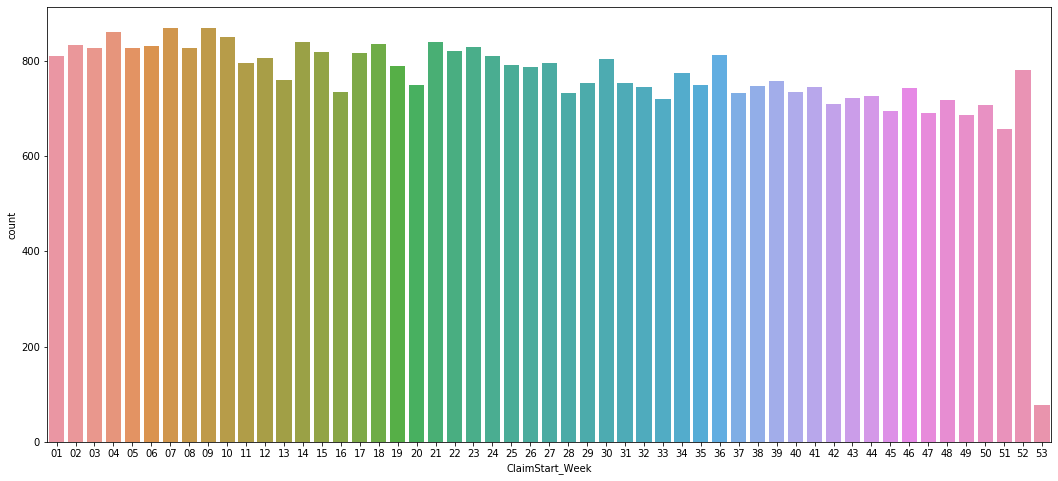

In [768]:
rcParams['figure.figsize'] = 18, 8
pd.options.display.max_rows = 999
weekly_claim_count = pd.DataFrame(Merged_Inpatient.groupby(['ClaimStart_Week'])['ClaimID'].agg(['count'])).reset_index()
weekly_claim_count.head(30)
sns.barplot(x = 'ClaimStart_Week', y = 'count', data = weekly_claim_count)

In [769]:
rcParams['figure.figsize'] = 18, 6
pd.options.display.max_rows = 999
weekly_claim_count = pd.DataFrame(Merged_Outpatient.groupby(['ClaimStart_Week'])['ClaimID'].agg('count')).rename(columns = {'Chronic_Condition_Count': 'Count'}).reset_index()
weekly_claim_count
#sns.barplot(x = 'ClaimStart_Week', y = 'Sum', data = weekly_claim_count)

,ClaimStart_Week,ClaimID
0,01,810
1,02,833
2,03,826
3,04,859
4,05,827
5,06,830
6,07,869
7,08,827
8,09,869
9,10,849


In [770]:
pd.options.display.max_rows = 999
pd.DataFrame(Merged_Inpatient.groupby(['ClaimStart_Week', 'ClaimStart_Day'])['ClaimID'].agg('count')).rename(columns = {'ClaimID': 'Count'})

Count
ClaimStart_Week ClaimStart_Day       
01              0                  94
                1                  90
                2                 129
                3                 121
                4                 120
                5                 135
                6                 121
02              0                 114
                1                 139
                2                 114
                3                 105
                4                 124
                5                 123
                6                 114
03              0                 129
                1                 101
                2                 108
                3                 114
                4                 126
                5                 124
                6                 124
04              0                 131
                1                 133
                2                 136
                3                 101
                4                 104
                5                 135
                6                 119
05              0                 131
                1                 105
                2                 124
                3                 104
                4                 109
                5                 143
                6                 111
06              0                 138
                1                 127
                2                 113
                3                 106
                4                 108
                5                 118
                6                 120
07              0                 124
                1                 145
                2                 111
                3                 135
                4                 121
                5                 105
                6                 128
08              0                 118
                1                 127
                2                 122
                3                 122
                4                 100
                5                 125
                6                 113
09              0                 122
                1                 121
                2                 125
                3                 144
                4                 104
                5                 122
                6                 131
10              0                 126
                1                 132
                2                 119
                3                 124
                4                 102
                5                 115
                6                 131
11              0                 122
                1                 113
                2                 106
                3                 113
                4                 114
                5                 113
                6                 115
12              0                 116
                1                 110
                2                 109
                3                 107
                4                 123
                5                 110
                6                 130
13              0                  99
                1                 116
                2                 101
                3                 103
                4                 111
                5                 110
                6                 120
14              0                 130
                1                 116
                2                 114
                3                 112
                4                 109
                5                 130
                6                 129
15              0                 122
                1                 129
                2                 112
                3                 133
                4                 100
                5                 111
    

## Identify the top 5 most frequent ClmAdmitDiagnosisCodes and trace their weekly seasonalities. Display the patterns you find.

## For the inpatient patients, is there any pattern between the durations of the treatments and the patient attributes?

In [771]:
Merged_Inpatient.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Chronic_Condition_Count,Visit_count,Age,Count_of_Claims,ClaimStart_Day,ClaimStart_Week
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes,7,3,66,3,6,15
1,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,No,7,3,66,3,0,36
2,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,7,3,66,3,3,38
3,BENE17521,1913-12-01,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes,5,1,96,1,1,04
4,BENE21718,1922-10-01,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes,2,1,87,1,5,42


In [772]:
Merged_Inpatient['Hospital_Stay'] = Merged_Inpatient['DischargeDt'] - Merged_Inpatient['AdmissionDt'] 

In [773]:
Merged_Inpatient['Hospital_Stay'] = Merged_Inpatient['Hospital_Stay'].dt.days

In [774]:
Merged_Inpatient[['Chronic_Condition_Count', 'Hospital_Stay']].corr()

,Chronic_Condition_Count,Hospital_Stay
Chronic_Condition_Count,1.000000,0.072334
Hospital_Stay,0.072334,1.000000


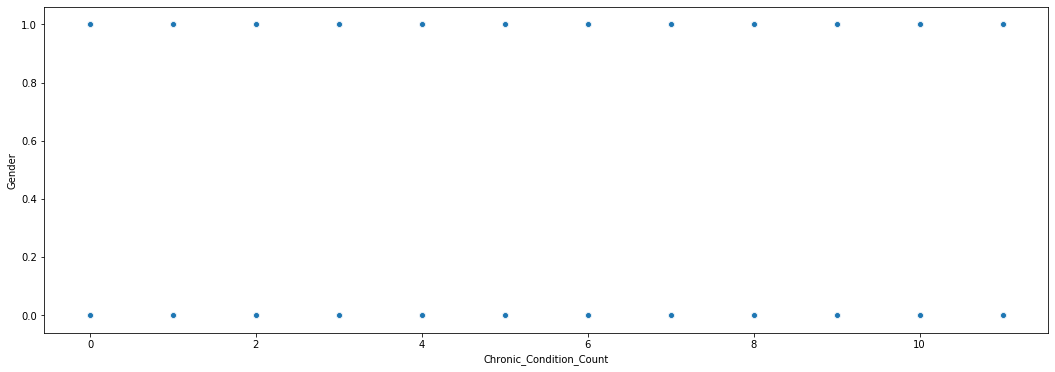

In [775]:
#sns.scatterplot(x = 'Chronic_Condition_Count', y = 'Gender', data = Merged_Inpatient)

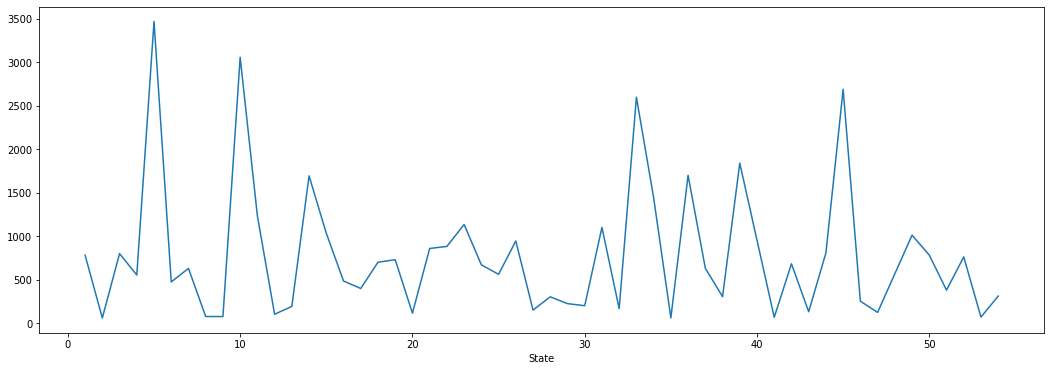

In [785]:
Merged_Inpatient.groupby('State')['BeneID'].agg('count').plot.line()

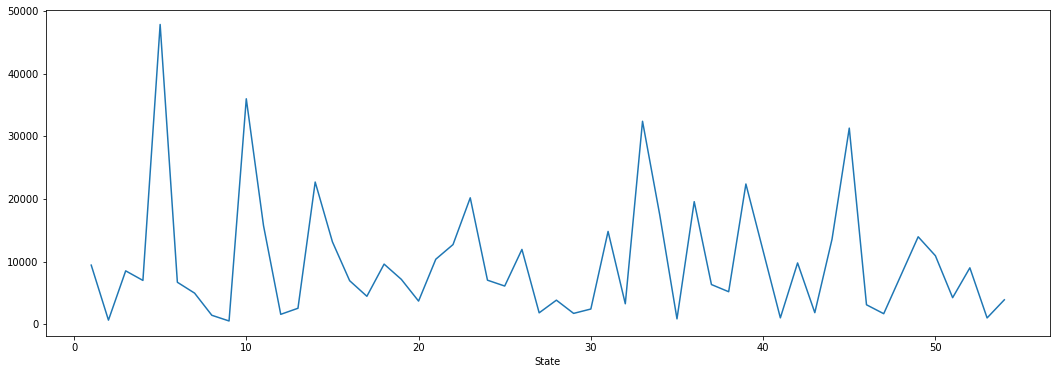

In [786]:
Merged_Outpatient.groupby('State')['BeneID'].agg('count').plot.line()

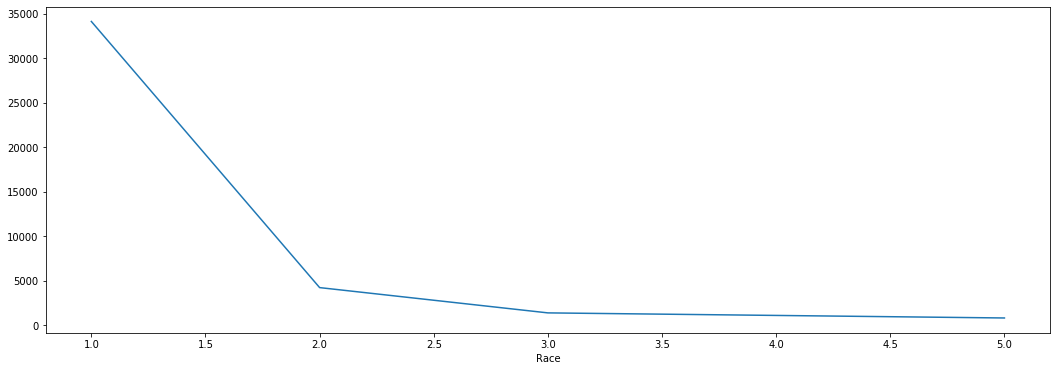

In [787]:
Merged_Inpatient.groupby('Race')['BeneID'].agg('count').plot.line()

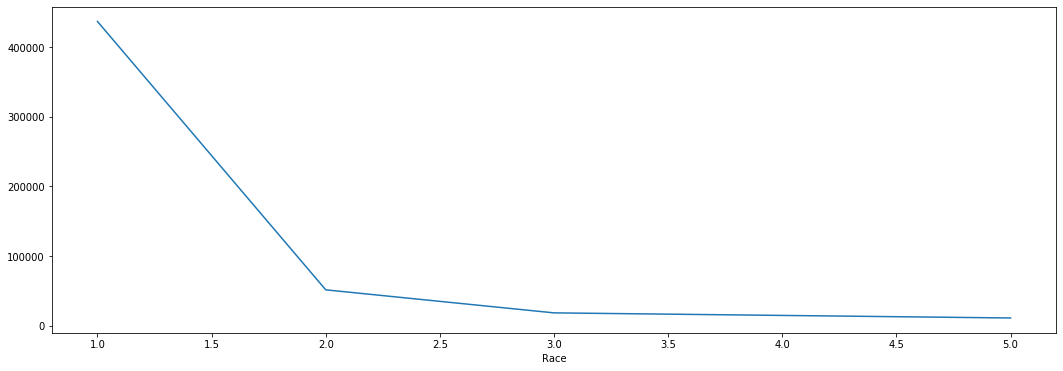

In [788]:
Merged_Outpatient.groupby('Race')['BeneID'].agg('count').plot.line()

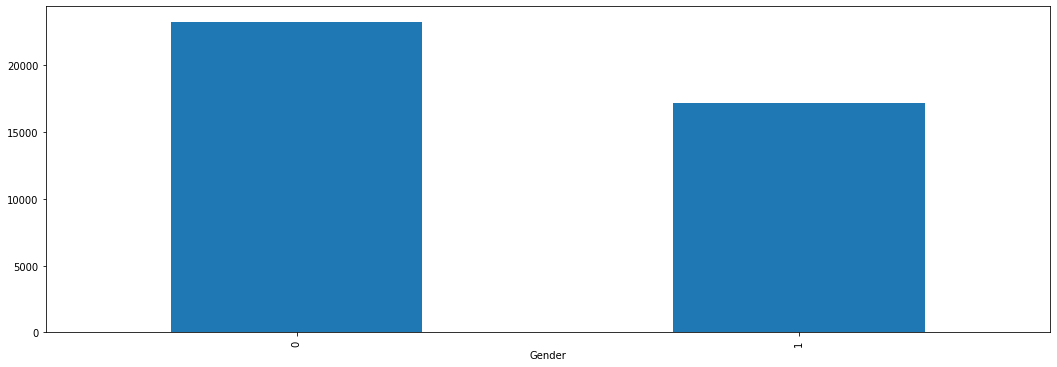

In [790]:
Merged_Inpatient.groupby('Gender')['BeneID'].agg('count').plot.bar()

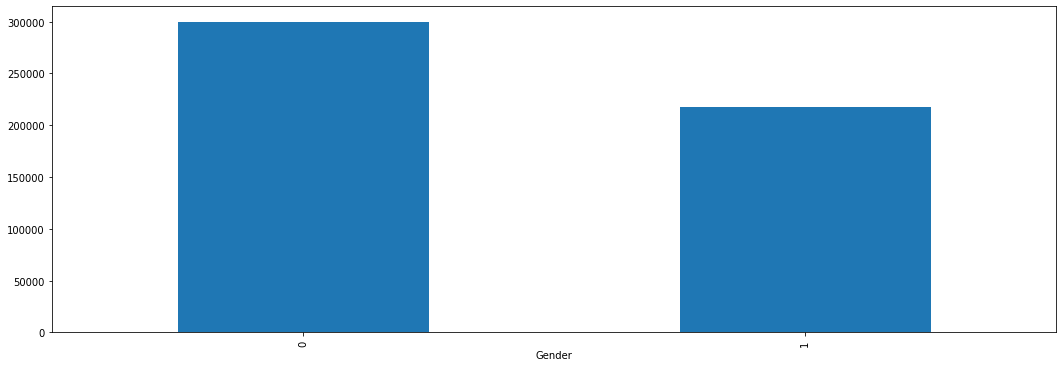

In [791]:
Merged_Outpatient.groupby('Gender')['BeneID'].agg('count').plot.bar()

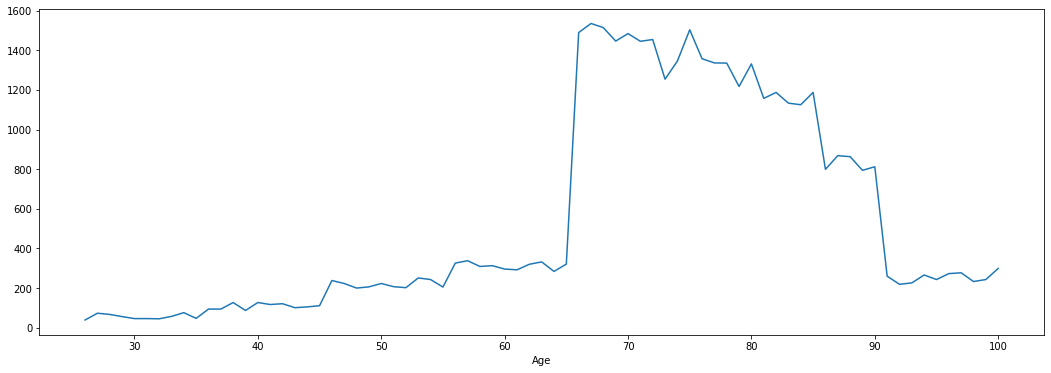

In [792]:
Merged_Inpatient.groupby('Age')['BeneID'].agg('count').plot.line()

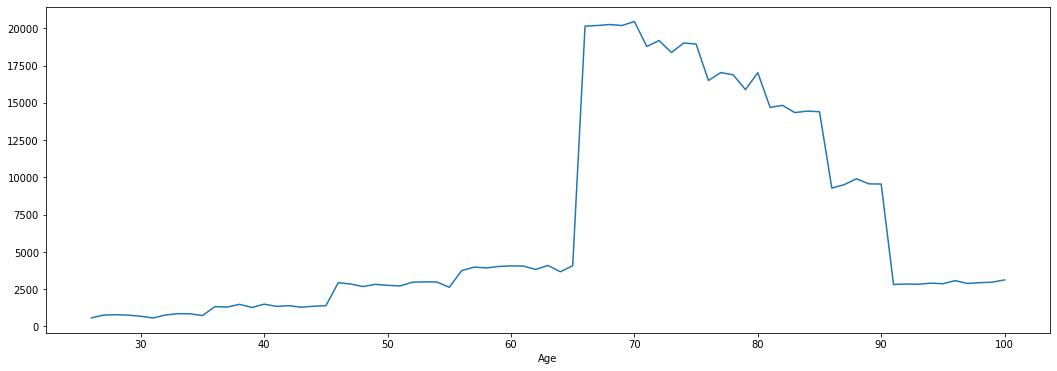

In [794]:
Merged_Outpatient.groupby('Age')['BeneID'].agg('count').plot.line()

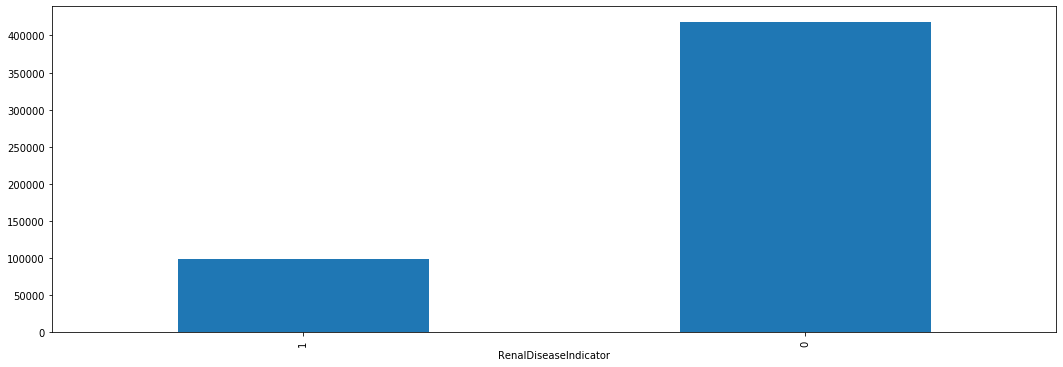

In [797]:
Merged_Outpatient.groupby('RenalDiseaseIndicator')['BeneID'].agg('count').plot.bar()

In [798]:
Merged_Inpatient.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Chronic_Condition_Count,Visit_count,Age,Count_of_Claims,ClaimStart_Day,ClaimStart_Week,Hospital_Stay
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes,7,3,66,3,6,15,6
1,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,No,7,3,66,3,0,36,2
2,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,7,3,66,3,3,38,3
3,BENE17521,1913-12-01,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes,5,1,96,1,1,04,12
4,BENE21718,1922-10-01,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes,2,1,87,1,5,42,18
